In [1]:
from source.python.sorting import insertion_sort, recursive_insertion_sort, selection_sort
from source.python.sorting_c.sorting_algs import insertion_sort_c, recursive_insertion_sort_c, selection_sort_c
import time
from typing import Callable
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Recursive insertion sort written in python quite quickly exceeds the maximum recursion depth, therefore it will be excluded from further considerations
!pytest source/tests/sort_testing.py

============================= test session starts ==============================
platform linux -- Python 3.11.4, pytest-7.4.3, pluggy-1.3.0
rootdir: /home/rbuntu/Grath/CLRS/Chapter2
collected 6 items                                                              

source/tests/sort_testing.py .F....                                      [100%]

=================================== FAILURES ===================================
____________ test_sorts[recursive_insertion_sort-arr1-sorted_arr1] _____________

sorting_alg = <function recursive_insertion_sort at 0x7fa844bbb100>
arr = [81, 14, 3, 94, 35, 31, ...], sorted_arr = [0, 0, 0, 0, 0, 0, ...]

    @pytest.mark.parametrize("sorting_alg, arr, sorted_arr", [(sort_alg, arr, sorted_arr) for sort_alg in sort_algs])
    def test_sorts(sorting_alg, arr, sorted_arr):
>       assert sorting_alg(arr) == sorted_arr

source/tests/sort_testing.py:27: 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
source/python/sortin

In [3]:
def measure_times(functions: list[Callable[[list[int]], list[int]]], sizes: list[int], samples: int = 1):
    random.seed(42) # Add random seed for reproducibility
    assert samples > 0, "Sample size must be and integer greater than zero"

    function_dictionary = dict([(function, []) for function in functions])

    for size in sizes:
        arrs = [[random.randint(0, 1000) for _ in range(size)] for _ in range(samples)]

        for function in functions:
            start = time.time()
            for arr in arrs:
                _ = functions[function](arr)
            total_time = time.time() - start
            function_dictionary[function].append(total_time / samples)
    
    return function_dictionary



In [4]:
functions = {'insertion_sort': insertion_sort, 'insertion_sort_c': insertion_sort_c, 'recursive_insertion_sort_c': recursive_insertion_sort_c, 'selection_sort': selection_sort, 'selection_sort_c': selection_sort_c}

In [5]:
# functions = {'insertion_sort_c': insertion_sort_c, 'recursive_insertion_sort_c': recursive_insertion_sort_c, 'selection_sort_c': selection_sort_c}

In [6]:
sizes = list(range(500, 10001, 500))
f_times = measure_times(functions=functions, sizes=sizes, samples=3)

In [10]:
f_times

{'insertion_sort': [0.003755648930867513,
  0.015081246693929037,
  0.031221310297648113,
  0.0558931032816569,
  0.08884882926940918,
  0.12673449516296387,
  0.17539310455322266,
  0.22696614265441895,
  0.3117513656616211,
  0.3788636525472005,
  0.4266853332519531,
  0.5036454200744629,
  0.6016502380371094,
  0.7005894184112549,
  0.789891799290975,
  0.9283422629038492,
  1.032455841700236,
  1.1486821174621582,
  1.3012207349141438,
  1.4536851247151692],
 'insertion_sort_c': [0.0002512931823730469,
  0.0004531542460123698,
  0.0006789366404215494,
  0.0011513233184814453,
  0.0015192031860351562,
  0.0019411245981852214,
  0.0025398731231689453,
  0.0031166871388753257,
  0.003914038340250651,
  0.004544417063395183,
  0.00535734494527181,
  0.0062189896901448565,
  0.007230440775553386,
  0.00851297378540039,
  0.009201526641845703,
  0.010995626449584961,
  0.011779705683390299,
  0.012907743453979492,
  0.01484211285909017,
  0.016752004623413086],
 'recursive_insertion_sort

In [11]:
df = pd.DataFrame(f_times, sizes).rename_axis(index='N')

In [12]:
df

,insertion_sort,insertion_sort_c,recursive_insertion_sort_c,selection_sort,selection_sort_c
N,,,,,
500,0.003756,0.000251,0.000212,0.003602,0.000232
1000,0.015081,0.000453,0.000550,0.014506,0.000624
1500,0.031221,0.000679,0.000749,0.032000,0.001175
2000,0.055893,0.001151,0.001173,0.058093,0.001963
2500,0.088849,0.001519,0.001771,0.089250,0.002830
3000,0.126734,0.001941,0.002294,0.126711,0.003945
3500,0.175393,0.002540,0.003066,0.174126,0.005259
4000,0.226966,0.003117,0.003920,0.226350,0.006826
4500,0.311751,0.003914,0.004702,0.291017,0.008502


[]

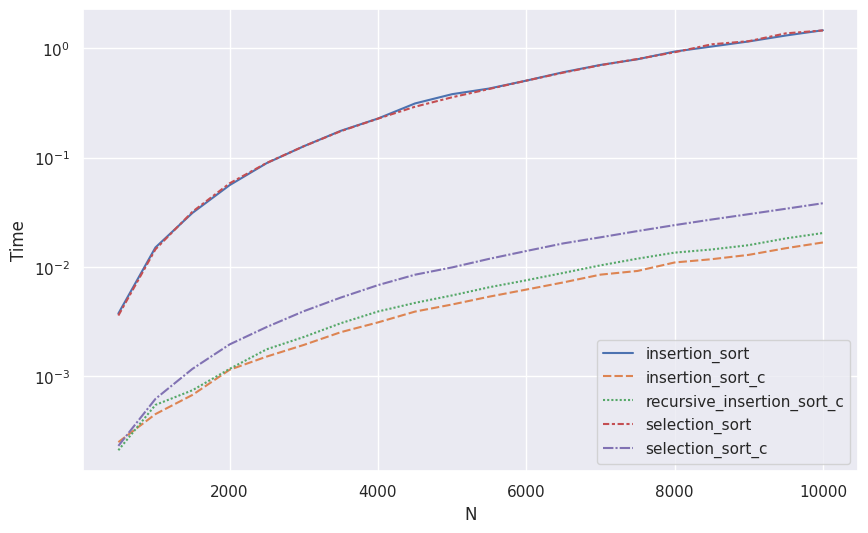

In [13]:
## 
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (10, 6)})
ax = sns.lineplot(data=df)
ax.set(ylabel='Time')
plt.yscale('log')
plt.plot()

[]

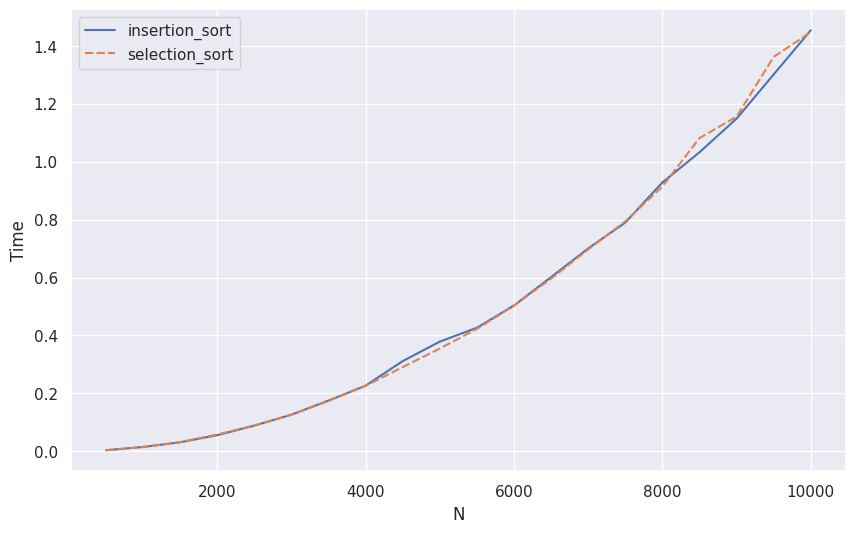

In [14]:
## 
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (10, 6)})
ax = sns.lineplot(data=df.iloc[:, [0,3]])
ax.set(ylabel='Time')
plt.plot()

[]

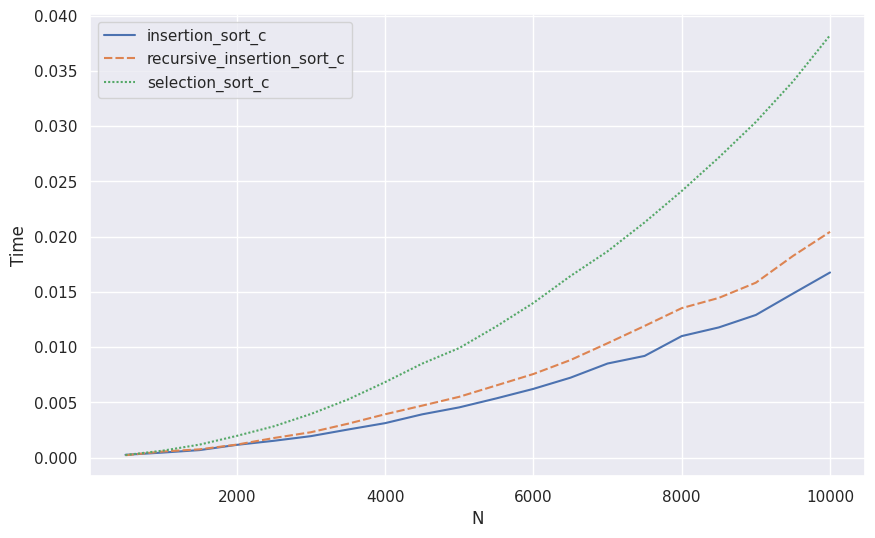

In [15]:
## 
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (10, 6)})
ax = sns.lineplot(data=df.iloc[:, [1,2,4]])
ax.set(ylabel='Time')
plt.plot()